<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case study: analyzing of movielens data</p>

> This Notebook uses a dataset extracted from the MovieLens site.

> We will use this dataset in several Workshops thereafter

## Dataset Download


Link to the dataset:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

once the download is complete, put it in a folder called *movielens* in the same folder as your notebook.




In [5]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Reading the dataset<br>
</p>
<br>
in this notebook you will use the 3 files:

> **ratings.csv:** *userId*,*movieId*,*rating*, *timestamp*

> **tags.csv:** *userId*,*movieId*, *tag*, *timestamp*

> **movies.csv:** *movieId*, *title*, *genres* <br>


In [6]:
movies = pd.read_csv('/content/movies.csv', sep=',')
tags = pd.read_csv('/content/tags.csv', sep=',')
ratings = pd.read_csv('/content/ratings.csv', sep=',')
# print(type(movies))
# movies.head(15)


In [7]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [8]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [9]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

### Let's calculate the sparsity of the dataset

In [10]:
size=len(ratings)

In [11]:
num_users=ratings['userId'].unique().shape[0]

In [12]:
num_items=ratings['movieId'].unique().shape[0]

In [13]:
sparsity = 1 - size / (num_users * num_items)

In [14]:
print(f'number of users: {num_users}, number of items: {num_items}')
print(f'matrix sparsity: {sparsity:f}')

number of users: 610, number of items: 9724
matrix sparsity: 0.983000


from the sparsity coefficient, we can conclude that the user-item matrix is too sparse (sparse) (98%)

<h1 style="font-size:2em;color:#2467C0">Data Structures</h1>

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [15]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
tags.index

RangeIndex(start=0, stop=3683, step=1)

In [17]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [18]:
# Extract rows 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
11,18,431,gangster,1462138749
2000,474,5450,women,1138039255


<h1 style="font-size:2em;color:#2467C0">Descriptive statistics </h1>

we will see how the ratings 'evaluations' are distributed!

In [19]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [20]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [21]:
ratings['rating'].mean()

3.501556983616962

In [22]:
ratings.mean()

userId       3.261276e+02
movieId      1.943530e+04
rating       3.501557e+00
timestamp    1.205946e+09
dtype: float64

In [23]:
ratings['rating'].min()

0.5

In [24]:
ratings['rating'].max()

5.0

In [25]:
ratings['rating'].std()

1.042529239060635

In [26]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

In [27]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,0.006773,-0.049348,0.097151
movieId,0.006773,1.000000,-0.004061,0.503669
rating,-0.049348,-0.004061,1.000000,-0.005802
timestamp,0.097151,0.503669,-0.005802,1.000000


In [28]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0         False
1         False
2         False
3         False
4         False
          ...  
100831    False
100832    False
100833    False
100834    False
100835    False
Name: rating, Length: 100836, dtype: bool


False

In [29]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data cleaning: deal with missing data</h1>

In [30]:
movies.shape

(9742, 3)

In [31]:
#nuls values

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

no null value !!! it's a good sign

In [32]:
ratings.shape

(100836, 4)

In [33]:


ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

no null value !!! it's a good sign

In [34]:
tags.shape

(3683, 4)

In [35]:
#nul values

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

we have some nul tags

In [36]:
tags = tags.dropna()

In [37]:
#do a test again?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [38]:
tags.shape

(3683, 4)

now we have no null value!!!! we have reduced the number of rows.

<h1 style="font-size:2em;color:#2467C0">data visualization</h1>

<h3 style="font-size:2em;color:#2467C0">rating distribution</h3>

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

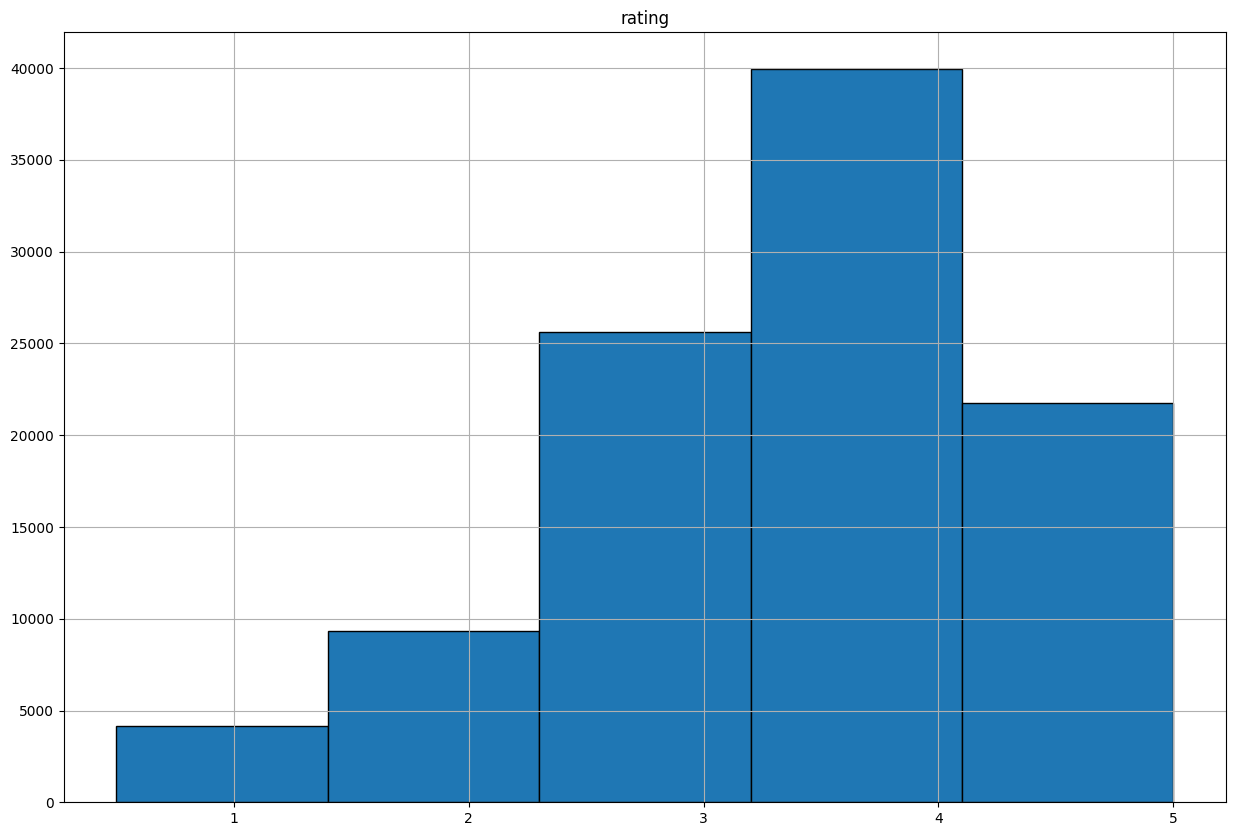

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

ratings.hist(column='rating', bins=5, ec='black', figsize=(15,10))

<Axes: >

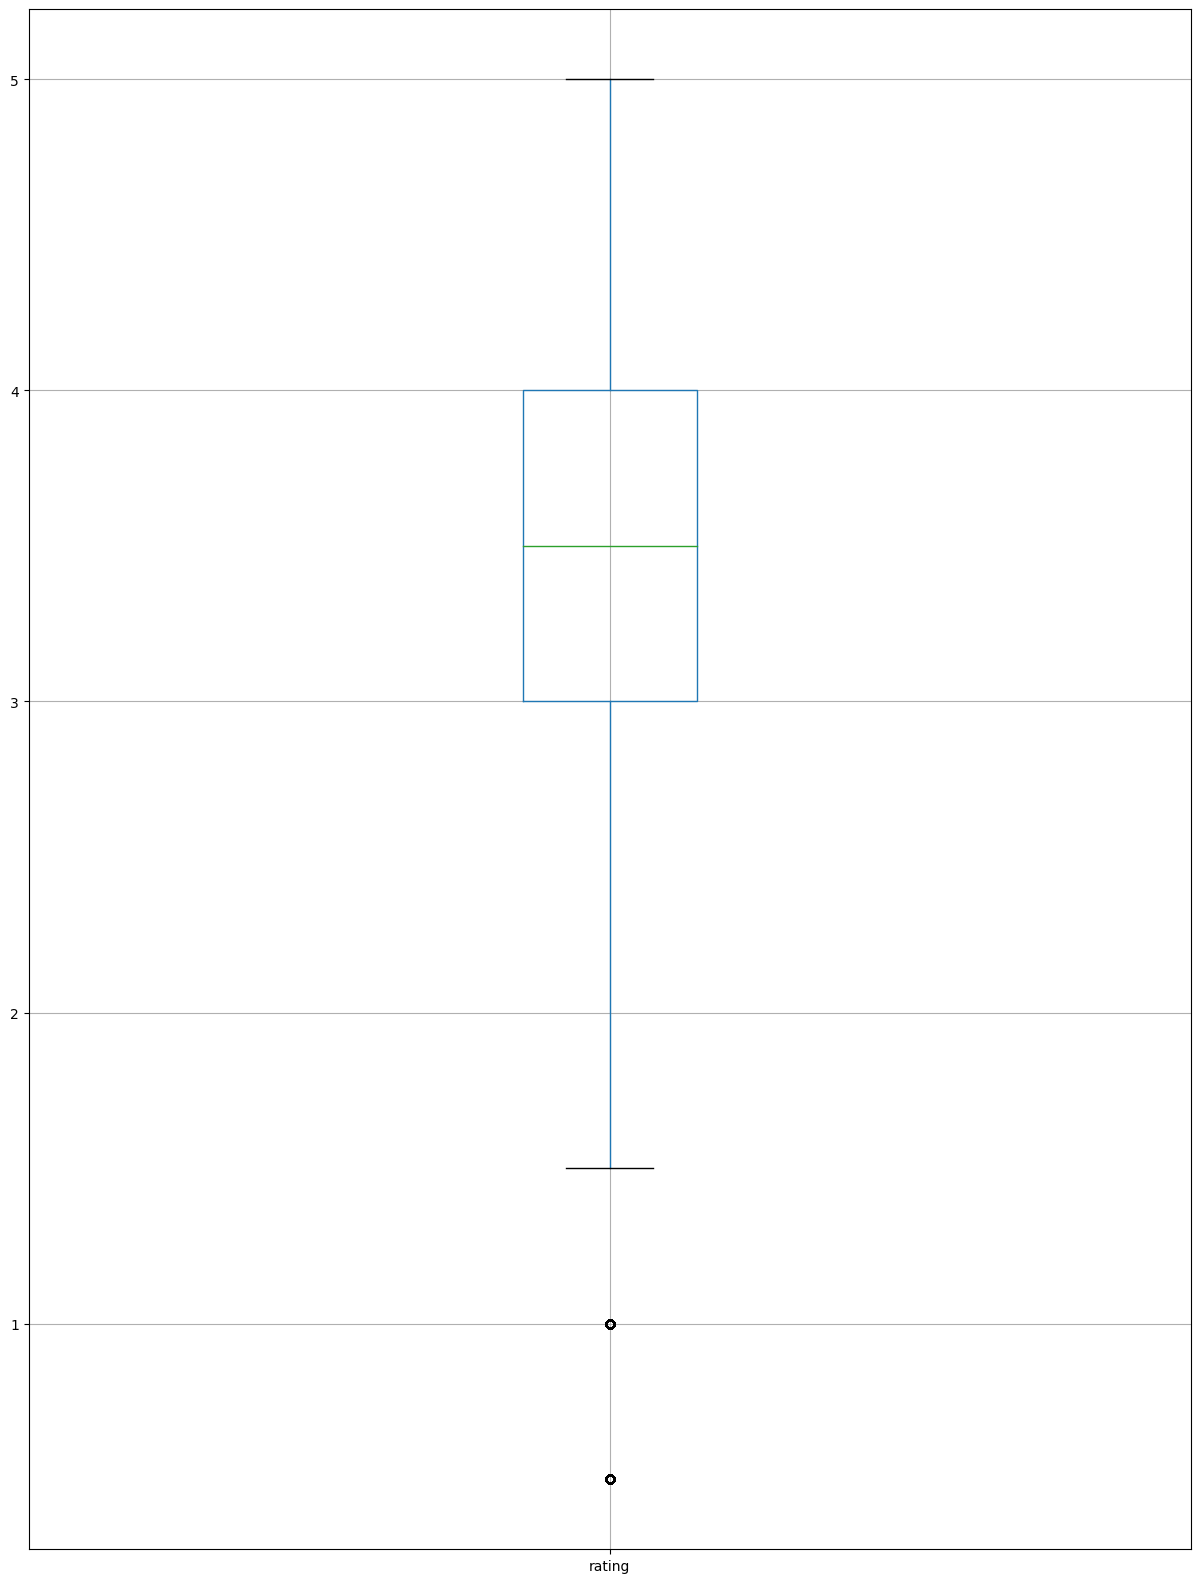

In [40]:
ratings.boxplot(column='rating', figsize=(15,20))

As expected, this appears to be a normal distribution, with most ratings centered around 3-4.

<h1 style="font-size:2em;color:#2467C0">cut out Columns</h1>


In [41]:
tags['tag'].head()

0              funny
1    Highly quotable
2       will ferrell
3       Boxing story
4                MMA
Name: tag, dtype: object

In [42]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [43]:
ratings[-10:]

,userId,movieId,rating,timestamp
100826,610,162350,3.5,1493849971
100827,610,163937,3.5,1493848789
100828,610,163981,3.5,1493850155
100829,610,164179,5.0,1493845631
100830,610,166528,4.0,1493879365
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [44]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

gun-fu              1
mice                1
aquarium            1
Boston              1
Capone              1
small towns         1
In Your Eyes        1
Lloyd Dobbler       1
weak plot           1
Heroic Bloodshed    1
Name: tag, dtype: int64

<Axes: >

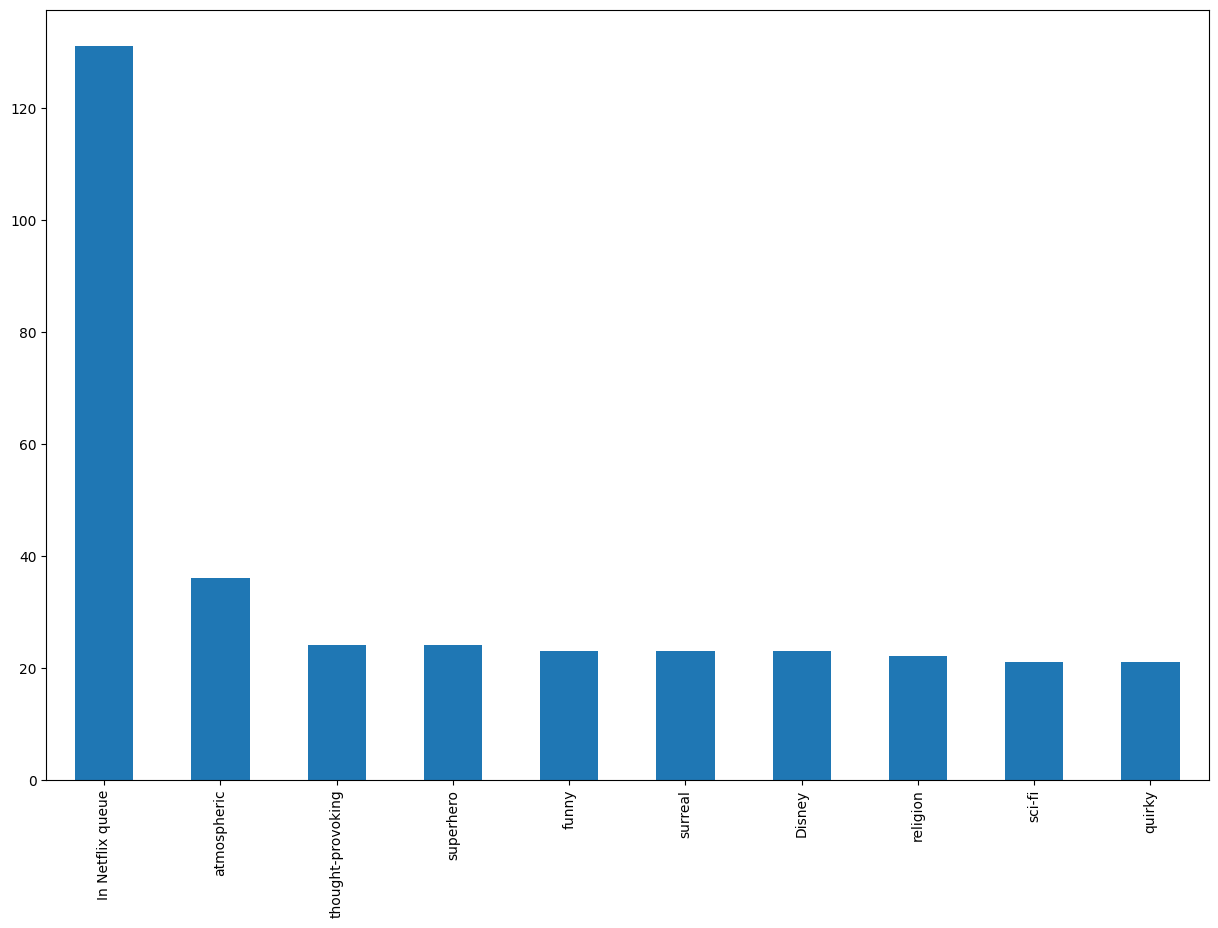

In [45]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">filters to select rows</h1>

In [46]:
is_highly_rated = ratings['rating'] >= 4.0
print(type(ratings[is_highly_rated]))

ratings[is_highly_rated][30:50]

<class 'pandas.core.frame.DataFrame'>


,userId,movieId,rating,timestamp
36,1,608,5.0,964982931
38,1,661,5.0,964982838
40,1,733,4.0,964982400
43,1,804,4.0,964980499
44,1,919,5.0,964982475
45,1,923,5.0,964981529
46,1,940,5.0,964982176
47,1,943,4.0,964983614
48,1,954,5.0,964983219
50,1,1023,5.0,964982681


In [47]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
is_animation = movies['genres'].str.contains('Animation')
#movies[is_animation].index

movies[is_animation][5:15]

,movieId,title,genres
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical
512,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical
522,610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
527,616,"Aristocats, The (1970)",Animation|Children
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...


In [49]:
movies[is_animation].head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12,13,Balto (1995),Adventure|Animation|Children
44,48,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
205,239,"Goofy Movie, A (1995)",Animation|Children|Comedy|Romance
272,313,"Swan Princess, The (1994)",Animation|Children
322,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
483,551,"Nightmare Before Christmas, The (1993)",Animation|Children|Fantasy|Musical
488,558,"Pagemaster, The (1994)",Action|Adventure|Animation|Children|Fantasy
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
511,594,Snow White and the Seven Dwarfs (1937),Animation|Children|Drama|Fantasy|Musical


<h1 style="font-size:2em;color:#2467C0">Group By et Aggregation </h1>

In [50]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
print(ratings_count)

        movieId
rating         
0.5        1370
1.0        2811
1.5        1791
2.0        7551
2.5        5550
3.0       20047
3.5       13136
4.0       26818
4.5        8551
5.0       13211


In [51]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [52]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [53]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
193581,1
193583,1
193585,1
193587,1
193609,1


<h1 style="font-size:2em;color:#2467C0">Merge dataframes</h1>

In [54]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [55]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


Other exemples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggregations, merge, and filter to deepen our analysis
</p>

In [57]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating,timestamp
0,1,3.920930,1.129835e+09
1,2,3.431818,1.135805e+09
2,3,3.259615,1.005110e+09
3,4,2.357143,8.985789e+08
4,5,3.071429,9.926643e+08


In [58]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating,timestamp
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1.537109e+09
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.5,1.537110e+09
9721,193585,Flint (2017),Drama,3.5,1.537110e+09
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.5,1.537110e+09
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.537158e+09


In [59]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5,1.537109e+09
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0,1.537099e+09
9717,193573,Love Live! The School Idol Movie (2015),Animation,4.0,1.537100e+09
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1.537109e+09
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.537158e+09


In [60]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

,movieId,title,genres,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1.129835e+09
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1.005110e+09
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,8.985789e+08
4,5,Father of the Bride Part II (1995),Comedy,3.071429,9.926643e+08
6,7,Sabrina (1995),Comedy|Romance,3.185185,9.665462e+08


In [61]:
box_office[is_comedy & is_highly_rated][-5:]

,movieId,title,genres,rating,timestamp
9708,190209,Jeff Ross Roasts the Border (2017),Comedy,4.0,1.530148e+09
9713,191005,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,4.5,1.537109e+09
9716,193571,Silver Spoon (2014),Comedy|Drama,4.0,1.537099e+09
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.0,1.537109e+09
9723,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,4.0,1.537158e+09


<h1 style="font-size:2em;color:#2467C0">String Operations</h1>


In [62]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split - multiple columns -

<br> </p>

In [63]:
movie_genres = movies['genres'].str.split('|', expand=True)
print(type(movie_genres))

<class 'pandas.core.frame.DataFrame'>


In [64]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

add a column

<br> </p>

In [65]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [66]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title

<br> </p>

In [67]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [68]:
movies.tail()

,movieId,title,genres,year
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1991


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

other exemples: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing "Timestamps"</h1>

In [71]:
tags = pd.read_csv('/content/tags.csv', sep=',')

In [72]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

In [73]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [74]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [75]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [76]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Select rows based on dates
</p>

In [77]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((3683, 5), (1710, 5))

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sort tables
</p>

In [78]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
1756,474,3181,Shakespeare,1137179352,2006-01-13 19:09:12
2212,474,6912,Rita Hayworth can dance!,1137179371,2006-01-13 19:09:31
1636,474,2494,Hungary,1137179426,2006-01-13 19:10:26
1635,474,2494,Holocaust,1137179426,2006-01-13 19:10:26
1497,474,1836,No DVD at Netflix,1137179444,2006-01-13 19:10:44
1961,474,4969,In Netflix queue,1137179563,2006-01-13 19:12:43
2409,474,26242,In Netflix queue,1137179570,2006-01-13 19:12:50
2413,474,27741,In Netflix queue,1137179587,2006-01-13 19:13:07
2231,474,7025,In Netflix queue,1137179593,2006-01-13 19:13:13
2485,474,41997,In Netflix queue,1137179603,2006-01-13 19:13:23


<h1 style="font-size:2em;color:#2467C0">average ratings over time</h1>
are the ratings linked to the release date of a film?

In [79]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
9719,193581,4.0
9720,193583,3.5
9721,193585,3.5
9722,193587,3.5
9723,193609,4.0


In [80]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
#joined.corr()

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,2.357143
4,5,Father of the Bride Part II (1995),Comedy,1995,3.071429


In [81]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

,year,rating
0,1902,3.500000
1,1903,2.500000
2,1908,4.000000
3,1915,2.000000
4,1916,3.562500
5,1917,4.500000
6,1919,2.000000
7,1920,3.678571
8,1921,4.100000
9,1922,3.531250


#### The distribution of the number of Ratings per year

<Axes: xlabel='year'>

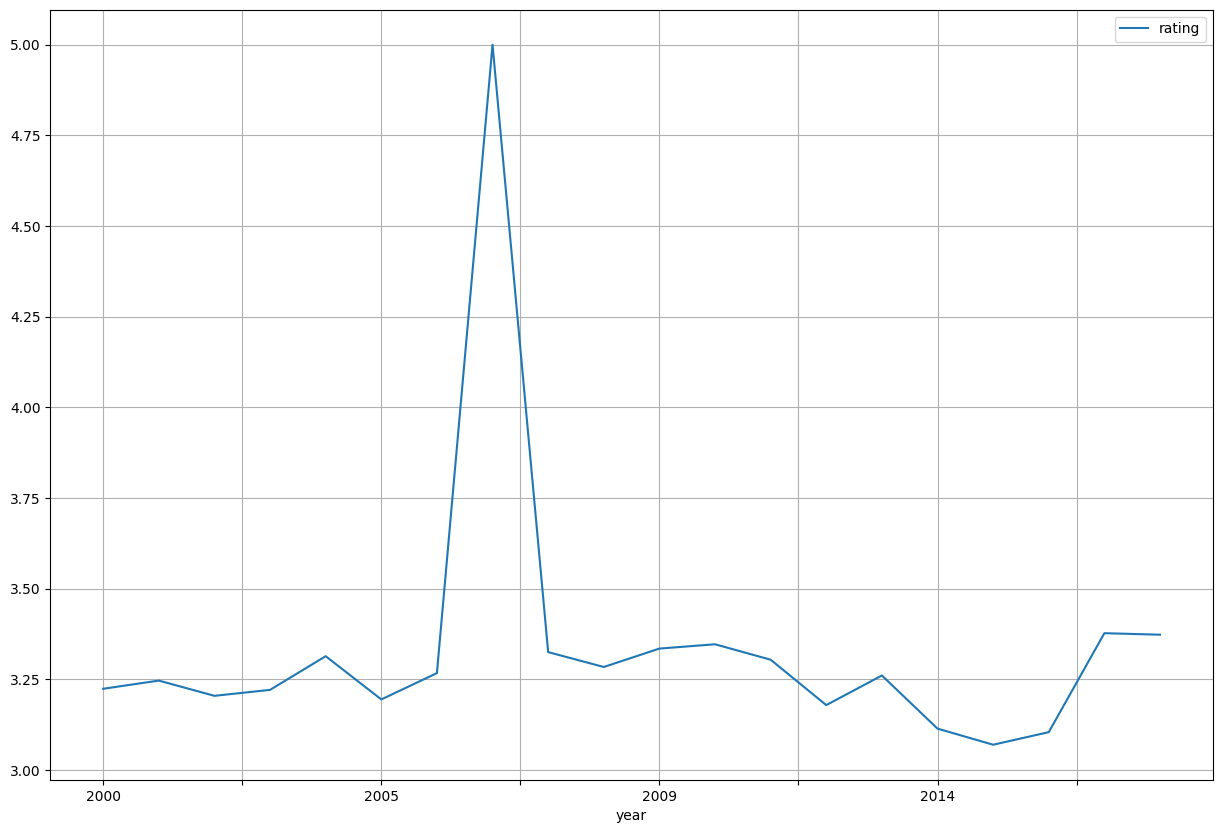

In [82]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

## Show the cloud

#### Define a function that calculates the number of times a genre appears

In [83]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
# pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [85]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords:
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


In [86]:
# store genres in a set
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [87]:
# calculate the number of occurrences for each gender
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596],
 ['Adventure', 1263],
 ['Crime', 1199],
 ['Sci-Fi', 980],
 ['Horror', 978],
 ['Fantasy', 779],
 ['Children', 664],
 ['Animation', 611],
 ['Mystery', 573],
 ['Documentary', 440],
 ['War', 382],
 ['Musical', 334],
 ['Western', 167],
 ['IMAX', 158],
 ['Film-Noir', 87],
 ['(no genres listed)', 34]]

In [88]:
!pip install  matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


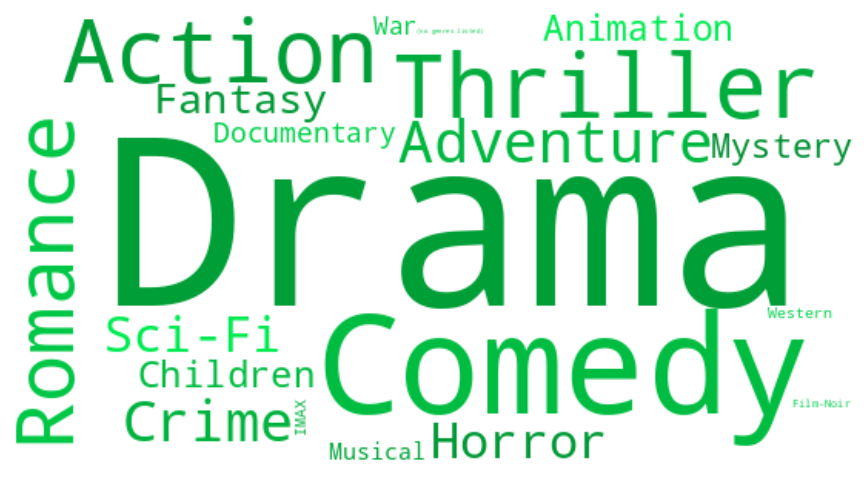

In [89]:
# A function that controls the color of words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


#final result
words = dict()
trunc_occurences = keyword_occurences[0:50]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 100 # define the color of the words
import matplotlib
f, ax = matplotlib.pyplot.subplots(figsize=(14, 6))
wordcloud = WordCloud(width=550,height=300, background_color='white',
                      max_words=1628,relative_scaling=0.7,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
matplotlib.pyplot.imshow(wordcloud, interpolation="bilinear")
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()

# Let's display the same result in a histogram

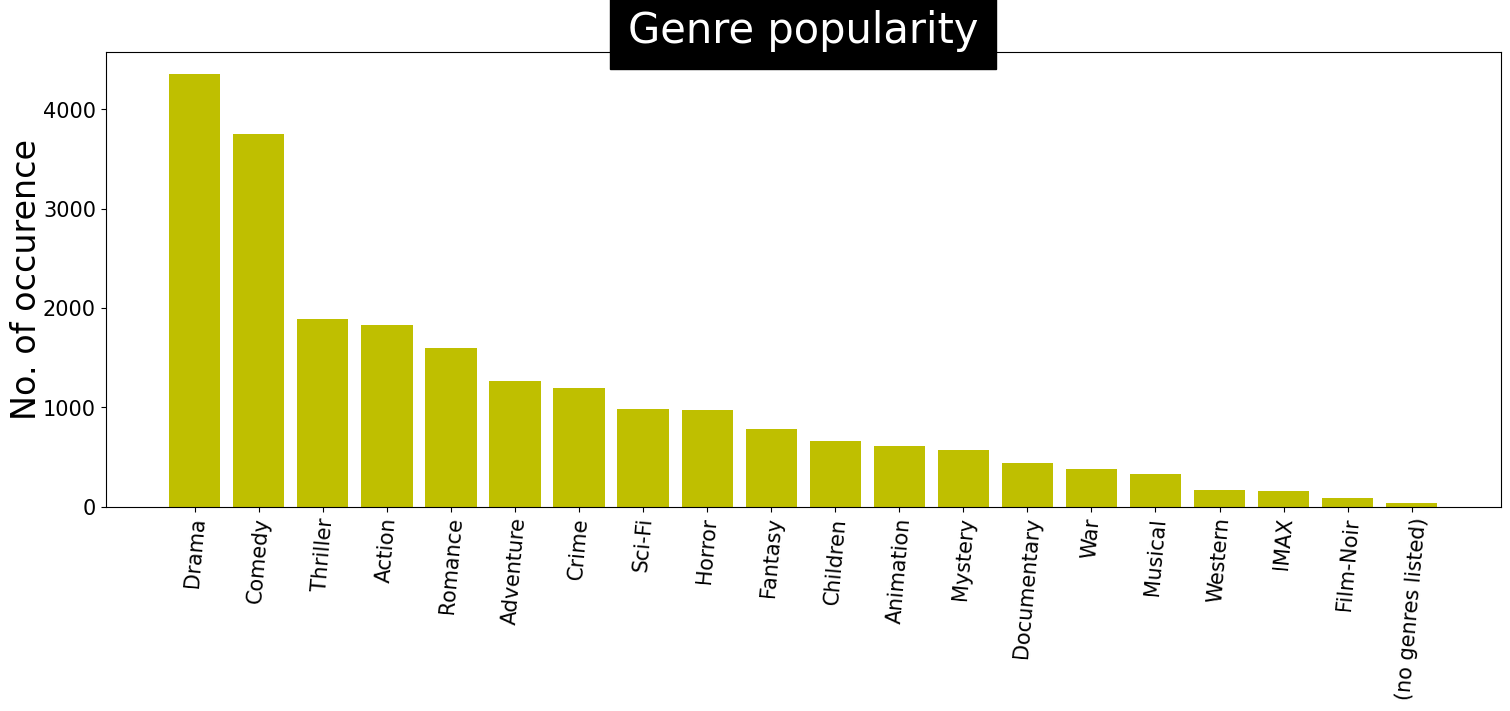

In [90]:

fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in trunc_occurences]
x_axis = [k for k,i in enumerate(trunc_occurences)]
x_label = [i[0] for i in trunc_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurence", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='y')
plt.title("Genre popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()